In [20]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1. Business Understanding
# Tujuan: Memprediksi apakah kondisi cuaca cocok untuk bermain atau tidak


In [21]:

# 2. Data Understanding
# Memuat dataset
data = pd.read_csv('Weather.csv')

In [22]:
# Menampilkan beberapa baris pertama dari dataset
data

,No,Outlook,Temperature,Humidity,Windy,Play
0,1,Sunny,Hot,High,False,No
1,2,Sunny,Hot,High,True,No
2,3,Cloudy,Hot,High,False,Yes
3,4,Rainy,Mild,High,False,Yes
4,5,Rainy,Cool,Normal,False,Yes
5,6,Rainy,Cool,Normal,True,Yes
6,7,Cloudy,Cool,Normal,True,Yes
7,8,Sunny,Mild,High,False,No
8,9,Sunny,Cool,Normal,False,Yes
9,10,Rainy,Mild,Normal,False,Yes


In [23]:
# Informasi tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No           14 non-null     int64 
 1   Outlook      14 non-null     object
 2   Temperature  14 non-null     object
 3   Humidity     14 non-null     object
 4   Windy        14 non-null     bool  
 5   Play         14 non-null     object
dtypes: bool(1), int64(1), object(4)
memory usage: 706.0+ bytes


In [24]:
# Statistik deskriptif
data.describe()

,No
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [25]:
# Memeriksa nilai yang hilang
data.isnull().sum()

No             0
Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

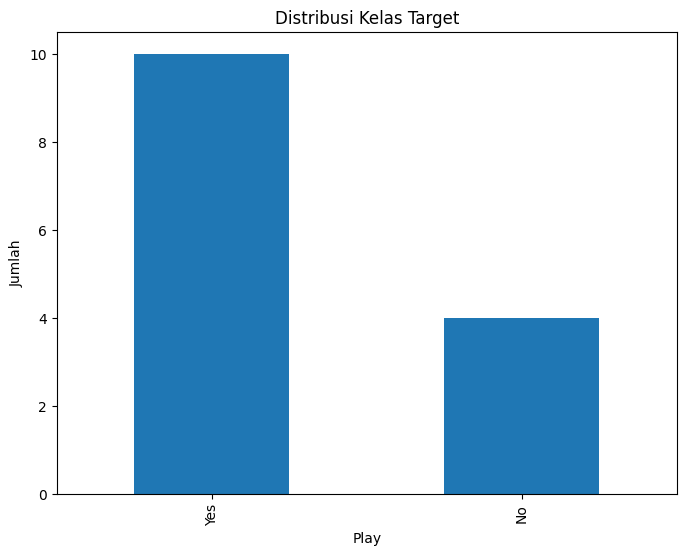

In [26]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(8, 6))
data['Play'].value_counts().plot(kind='bar')
plt.title('Distribusi Kelas Target')
plt.xlabel('Play')
plt.ylabel('Jumlah')
plt.show()

In [27]:
# 3. Data Preparation
# Menjadikan kolom 'No' sebagai index
data = data.set_index('No')

# Menampilkan beberapa baris pertama dari dataset untuk memverifikasi perubahan
print(data.head())

   Outlook Temperature Humidity  Windy Play
No                                         
1    Sunny         Hot     High  False   No
2    Sunny         Hot     High   True   No
3   Cloudy         Hot     High  False  Yes
4    Rainy        Mild     High  False  Yes
5    Rainy        Cool   Normal  False  Yes


In [28]:
# Encoding variabel kategorikal
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

In [29]:

# Memisahkan fitur dan target
X = data.drop('Play', axis=1)
y = data['Play']

In [30]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# 4. Modeling
# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# 5. Evaluation
# Membuat prediksi
y_pred = dt_model.predict(X_test)


In [33]:
# Menghitung metrik performa
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')  

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}") 

Accuracy: 0.67
Precision: 0.83
Recall: 0.67
F1 Score: 0.67


In [41]:
# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Yes','No']))


Classification Report:
              precision    recall  f1-score   support

         Yes       0.50      1.00      0.67         1
          No       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [35]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

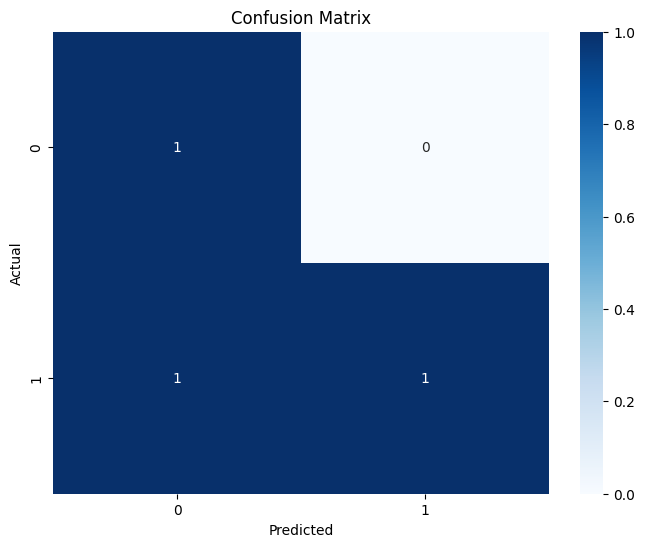

In [36]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

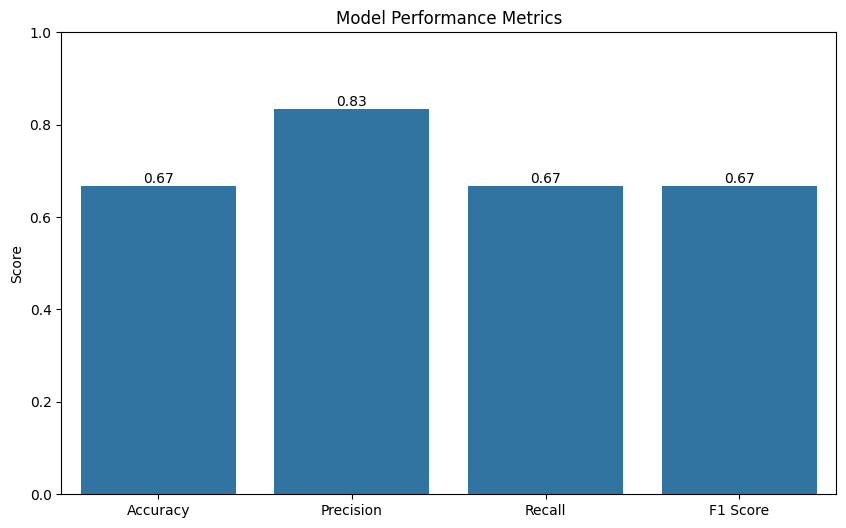

In [37]:
# Visualisasi metrik performa
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=scores)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
for i, v in enumerate(scores):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

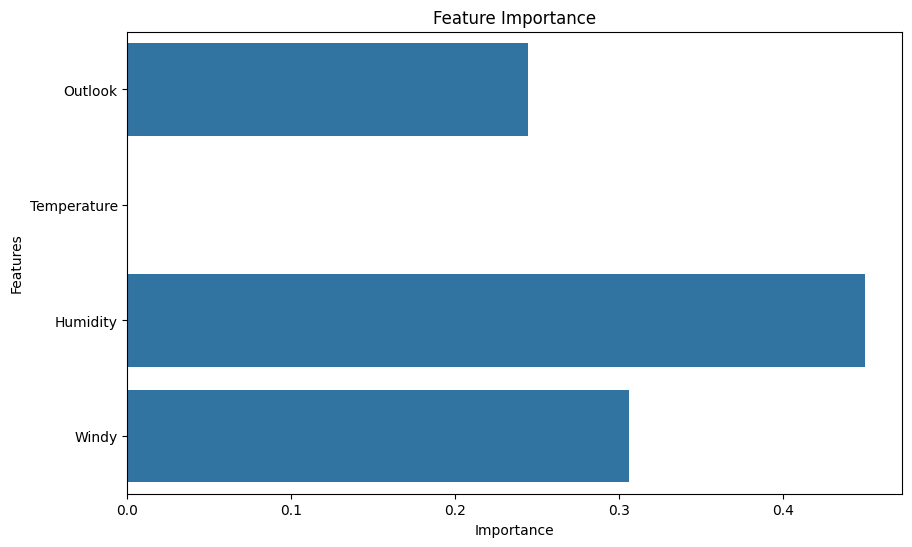

In [38]:
# Visualisasi feature importance
feature_importance = dt_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()